# A Bio-inspired Quaternion Local Phase CNN Layer with Contrast Invariance and  Linear Sensitivity to Rotation Angles
## Visualization rotation regression
---
PRL 2019

In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
__author__ = ["E. Ulises Moya", " Sebastian Salazar-Colores", "Abraham Sanchez", "Sebastian Xambò", "Ulises Cortes"]
__copyright__ = "Copyright 2019, Gobierno de Jalisco"
__credits__ = ["E. Ulises Moya"]
__license__ = "MIT"
__version__ = "0.0.2"
__maintainer__ = ["E. Ulises Moya", "Abraham Sanchez"]
__email__ = "eduardo.moya@jalisco.gob.mx"
__status__ = "Development"


Import area

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import pandas as pd
import seaborn as sns

List all files related with "loss"

In [3]:
!ls -l *pred*

-rw-rw-r-- 1 ulises ulises 40000 nov  9 15:08 prediction_conv_cifar10.csv
-rw-rw-r-- 1 ulises ulises 40000 nov  9 15:08 prediction_conv_mnist.csv
-rw-rw-r-- 1 ulises ulises 40000 nov  6 11:43 prediction_q9_cifar10.csv
-rw-rw-r-- 1 ulises ulises 40000 nov  6 10:59 prediction_q9_mnist.csv


In [4]:
# We have used two datasets
c='cifar10'
m='mnist'

In [29]:
# Each  loos .csv has 100   trained images, and  1000 of epochs for training,   
loss_ex = pd.read_csv('val_loss_conv_%s.csv' %(m), header=None)
img,epochs= loss_ex.shape
print('Images',img,', trained  for epochs', epochs-1,', The last col has the label of the images', epochs)
print(loss_ex.head(1))
#Each Prediction csv contains

pred_ex = pd.read_csv('prediction_conv_%s.csv' %(c), header=None)
img,angles= pred_ex.shape
print('Images',img,', tested angles over', angles,)
print(pred_ex.head(1))

Images 100 , trained  for epochs 1000 , The last col has the label of the images 1001
       0        1         2         3        4         5         6     \
0  0.082972  0.08298  0.082963  0.082996  0.08306  0.083031  0.082997   

       7         8         9     ...      991       992       993       994   \
0  0.082995  0.082971  0.082974  ...  0.001611  0.000986  0.000391  0.000348   

       995      996       997      998      999   1000  
0  0.000627  0.00225  0.002074  0.00112  0.00102   5.0  

[1 rows x 1001 columns]
Images 100 , tested angles over 16
         0         1         2        3         4         5         6   \
0  0.066531  0.114655  0.205982  0.29804  0.358203  0.415355  0.498285   

         7         8         9         10        11        12        13  \
0  0.563138  0.605808  0.655458  0.722126  0.764561  0.824818  0.903492   

         14   15  
0  0.947525  6.0  


---
OPEN CSV related with rotations

In [30]:
#q9 outputs,
m_loss_q9 = pd.read_csv('loss_q9_%s.csv' %(m), header=None).iloc[:,:1000] # we only take the firts 1000 cols
c_loss_q9 = pd.read_csv('loss_q9_%s.csv' %(c), header=None).iloc[:,:1000]
v_m_loss_q9 = pd.read_csv('val_loss_q9_%s.csv' %(m), header=None).iloc[:,:1000]
v_c_loss_q9 = pd.read_csv('val_loss_q9_%s.csv' %(c), header=None).iloc[:,:1000]
m_pred_q9 = pd.read_csv('prediction_q9_%s.csv' %(m), header=None)
c_pred_q9 = pd.read_csv('prediction_q9_%s.csv' %(c), header=None)

#conv outputs
m_loss_conv = pd.read_csv('loss_conv_%s.csv' %(m), header=None).iloc[:,:1000] # we only take the firts 1000 cols
c_loss_conv = pd.read_csv('loss_conv_%s.csv' %(c), header=None).iloc[:,:1000]
v_m_loss_conv = pd.read_csv('val_loss_conv_%s.csv' %(m), header=None).iloc[:,:1000]
v_c_loss_conv = pd.read_csv('val_loss_conv_%s.csv' %(c), header=None).iloc[:,:1000]
m_pred_conv = pd.read_csv('prediction_conv_%s.csv' %(m), header=None)
c_pred_conv = pd.read_csv('prediction_conv_%s.csv' %(c), header=None)





In [31]:
m_pred_conv.iloc[:,:].head() # prediction over 15  angles

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.065273,0.070744,0.124376,0.219074,0.311383,0.392895,0.447330,0.520931,0.584206,0.670081,0.726168,0.764775,0.890995,0.912723,0.912970,5.0
1,0.080342,0.153229,0.189161,0.284054,0.382216,0.407946,0.506411,0.606651,0.664191,0.739853,0.790647,0.814802,0.856828,0.918127,0.937637,4.0
2,0.113069,0.114320,0.129197,0.209525,0.266548,0.336040,0.412431,0.489187,0.549894,0.617274,0.696080,0.764530,0.881561,0.900244,0.901713,1.0
3,0.100860,0.103440,0.154064,0.266899,0.307595,0.361986,0.424195,0.513547,0.605644,0.664384,0.749382,0.795523,0.874707,0.896338,0.897130,9.0
4,0.499777,0.499777,0.499777,0.499777,0.499777,0.499777,0.499777,0.499777,0.499777,0.499777,0.499777,0.499777,0.499777,0.499777,0.499777,2.0


(15,)


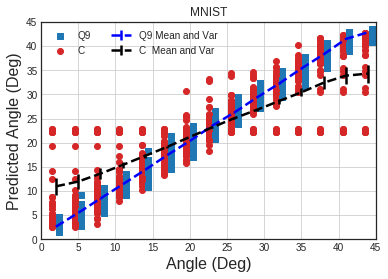

In [32]:

angle = np.arange(2, 46, 3)
print(angle.shape)
fig, ax = plt.subplots()
for i in range(0, 100):
    ax.scatter(angle+0.45, 45*m_pred_q9.iloc[i,:15].values, c='tab:blue',marker='s')
    ax.scatter(angle-0.45, 45*m_pred_conv.iloc[i,:15].values, c='tab:red')
    

pred_q9_m =  m_pred_q9.iloc[:,:15].mean()
pred_conv_m= m_pred_conv.iloc[:,:15].mean()
y_pred_q9_m =  m_pred_q9.iloc[:,:15].var()
y_pred_conv_m= m_pred_conv.iloc[:,:15].var()


ax.errorbar(angle, 45*pred_q9_m.values, yerr=45*y_pred_q9_m, ls='--', lw=2.5,c='blue', label='Q9 Mean and Var')
ax.errorbar(angle, 45*pred_conv_m.values, yerr=45*y_pred_conv_m, ls='--',lw=2.5, c='black', label='C  Mean and Var')    
ax.scatter(angle+0.45, 45*m_pred_q9.iloc[1,:15].values, label='Q9',c='tab:blue',marker='s')
ax.scatter(angle-0.45, 45*m_pred_conv.iloc[1,:15].values, label='C',c='tab:red')
#ax.plot(epochs, m_conv.values, '-r', label='C')
ax.set_title('MNIST')
ax.set_xlabel("Angle (Deg)", fontsize=16)
ax.set_ylabel("Predicted Angle (Deg)", fontsize=16)
ax.set_xlim(0,45)
ax.set_ylim(0,45)
plt.grid(True)
#ax.set ('l')
#ax.axis('equal')
leg = ax.legend(ncol=2, fancybox=True)
#leg = ax.legend();

(15,)


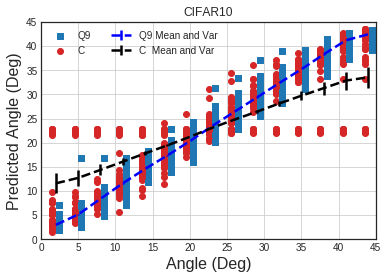

In [33]:
angle = np.arange(2, 46, 3)
print(angle.shape)
fig, ax = plt.subplots()
for i in range(0, 100):
    ax.scatter(angle+0.45, 45*c_pred_q9.iloc[i,:15].values, c='tab:blue',marker='s')
    ax.scatter(angle-0.45, 45*c_pred_conv.iloc[i,:15].values, c='tab:red')
    
pred_q9_c =  c_pred_q9.iloc[:,:15].mean()
pred_conv_c= c_pred_conv.iloc[:,:15].mean()
y_pred_q9_c =  c_pred_q9.iloc[:,:15].var()
y_pred_conv_c= c_pred_conv.iloc[:,:15].var()


ax.errorbar(angle, 45*pred_q9_c.values, yerr=45*y_pred_q9_c, ls='--', lw=2.5,c='blue', label='Q9 Mean and Var')
ax.errorbar(angle, 45*pred_conv_c.values, yerr=45*y_pred_conv_c, ls='--', lw=2.5,c='black', label='C  Mean and Var')
    
ax.scatter(angle+0.45, 45*c_pred_q9.iloc[1,:15].values, label='Q9',c='tab:blue',marker='s')
ax.scatter(angle-0.45, 45*c_pred_conv.iloc[1,:15].values,  label='C',c='tab:red')
#ax.plot(epochs, m_conv.values, '-r', label='C')
ax.set_title('CIFAR10')
ax.set_xlabel("Angle (Deg)", fontsize=16)
ax.set_ylabel("Predicted Angle (Deg)", fontsize=16)
ax.set_xlim(0,45)
ax.set_ylim(0,45)
plt.grid(True)
#ax.set ('l')
#ax.axis('equal')
leg = ax.legend(ncol=2, fancybox=True)
#leg = ax.legend();

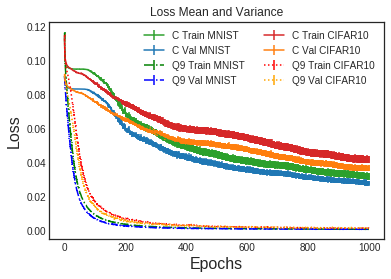

In [52]:
epochs=np.arange(0,1000)
c_q9=c_loss_q9.mean()
c_conv=c_loss_conv.mean()
yerr_q9_c=c_loss_q9.var()
yerr_conv_c=c_loss_conv.var()
v_c_q9=v_c_loss_q9.mean()
v_c_conv=v_c_loss_conv.mean()
v_yerr_q9_c=v_c_loss_q9.var()
v_yerr_conv_c=v_c_loss_conv.var()


m_q9=m_loss_q9.mean()
m_conv=m_loss_conv.mean()
yerr_q9_m=m_loss_q9.var()
yerr_conv_m=m_loss_conv.var()
v_m_q9=v_m_loss_q9.mean()
v_m_conv=v_m_loss_conv.mean()
v_yerr_q9_m=v_m_loss_q9.var()
v_yerr_conv_m=v_m_loss_conv.var()


fig, ax = plt.subplots()

#fig, ax = plt.subplots()

ax.errorbar(epochs, m_conv.values, yerr=yerr_conv_m, ls='-', c='tab:green', label='C Train MNIST')
ax.errorbar(epochs, v_m_conv.values, yerr=v_yerr_conv_m,c='tab:blue', label='C Val MNIST')
ax.errorbar(epochs, m_q9.values, yerr=yerr_q9_m, ls='-.', c='green', label='Q9 Train MNIST')
ax.errorbar(epochs, v_m_q9.values, yerr=v_yerr_q9_m,ls='-.',c='blue', label='Q9 Val MNIST')

ax.errorbar(epochs, c_conv.values, yerr=yerr_conv_c, ls='-', c='tab:red', label='C Train CIFAR10')
ax.errorbar(epochs, v_c_conv.values, yerr=v_yerr_conv_c,c='tab:orange', label='C Val CIFAR10')
ax.errorbar(epochs, c_q9.values, yerr=yerr_q9_c, ls=':',c='red', label='Q9 Train CIFAR10')
ax.errorbar(epochs, v_c_q9.values, yerr=v_yerr_q9_c,ls=':',c='orange', label='Q9 Val CIFAR10')

#ax.plot(epochs, m_conv.values, '-r', label='C')
ax.set_xlabel("Epochs", fontsize=16)
ax.set_ylabel("Loss", fontsize=16)
ax.set_title('Loss Mean and Variance')
leg = ax.legend(ncol=2, fancybox=True)

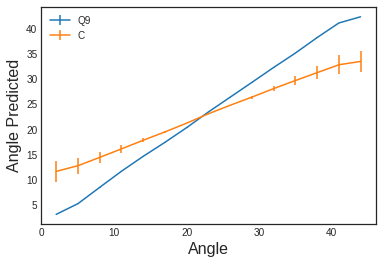

In [35]:
pred_q9_c =  c_pred_q9.iloc[:,:15].mean()
pred_conv_c= c_pred_conv.iloc[:,:15].mean()
y_pred_q9_c =  c_pred_q9.iloc[:,:15].var()
y_pred_conv_c= c_pred_conv.iloc[:,:15].var()

fig, ax = plt.subplots()
ax.errorbar(angle, 45*pred_q9_c.values, yerr=45*y_pred_q9_c, label='Q9')
ax.errorbar(angle, 45*pred_conv_c.values, yerr=45*y_pred_conv_c, label='C')
#ax.plot(epochs, m_conv.values, '-r', label='C')
ax.set_xlabel("Angle", fontsize=16)
ax.set_ylabel("Angle Predicted", fontsize=16)

leg = ax.legend();

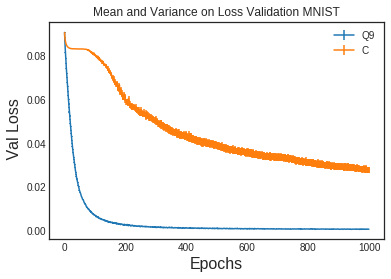

In [36]:
epochs=np.arange(0,1000)
v_m_q9=v_m_loss_q9.mean()
v_m_conv=v_m_loss_conv.mean()
v_yerr_q9_m=v_m_loss_q9.var()
v_yerr_conv_m=v_m_loss_conv.var()
fig, ax = plt.subplots()
ax.errorbar(epochs, v_m_q9.values, yerr=v_yerr_q9_m, label='Q9')
ax.errorbar(epochs, v_m_conv.values, yerr=v_yerr_conv_m, label='C')
#ax.plot(epochs, m_conv.values, '-r', label='C')
ax.set_xlabel("Epochs", fontsize=16)
ax.set_ylabel(" Val Loss", fontsize=16)
ax.set_title('Mean and Variance on Loss Validation MNIST')
leg = ax.legend();